In [1]:
import chardet
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Project Description
1. Aggregate data on CPI, Core CPI, PCE, and Core PCE. Plot the troughs of these indices compared to troughs during recessions. 
2. Calculate the difference between average minimum inflation in each business cycle and average inflation (for the past 50 years).
3. Plot the difference between wage inflation and CPI inflation for 2-year periods. 
4. Plot the distribution of change in core inflation vs. wage inflation. 


## Task 1: Plotting the troughs of CPI, Core CPI, PCE, and Core PCE compared to the troughs during recessions. We will examine the following recessions: 
* Recession of 1969 - 1970 (December 1969  - November 1970)
* Recession of 1980 - 1982 (January 1980 - July 1980 and July 1981 to November 1982)
* Early 1990s (July  1990 -  March 1991)
* Early 2000s (March 2001 - November 2001)
* Great Recession (December 2007 - June 2009)
* COVID-19 (February 2020 - April 2020)

In [8]:
# CPI historical data: https://fred.stlouisfed.org/series/CPILFESL
# Core CPI historical data: https://fred.stlouisfed.org/series/CPILFESL

# Loading the data. Converted from xlsx to csv to avoid encoding errors.
core_cpi = pd.read_csv('core_cpi.csv')
overall_cpi = pd.read_csv('overall_cpi.csv')

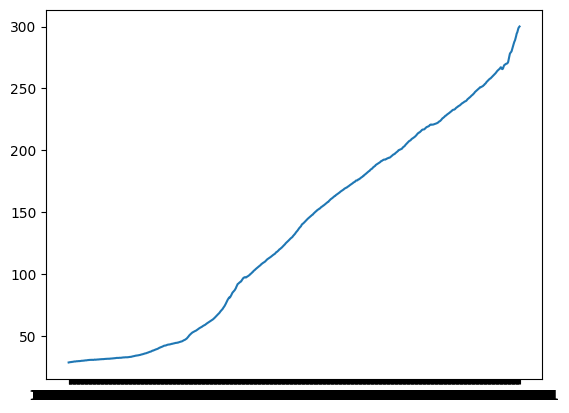

In [9]:
plt.plot(core_cpi['observation_date'], core_cpi['CPILFESL'])
plt.show()